# Librerias

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Cargamos datos

In [2]:
df = pd.read_csv('../01_data/train_sin_nulos.csv', index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


# Identificamos outliers

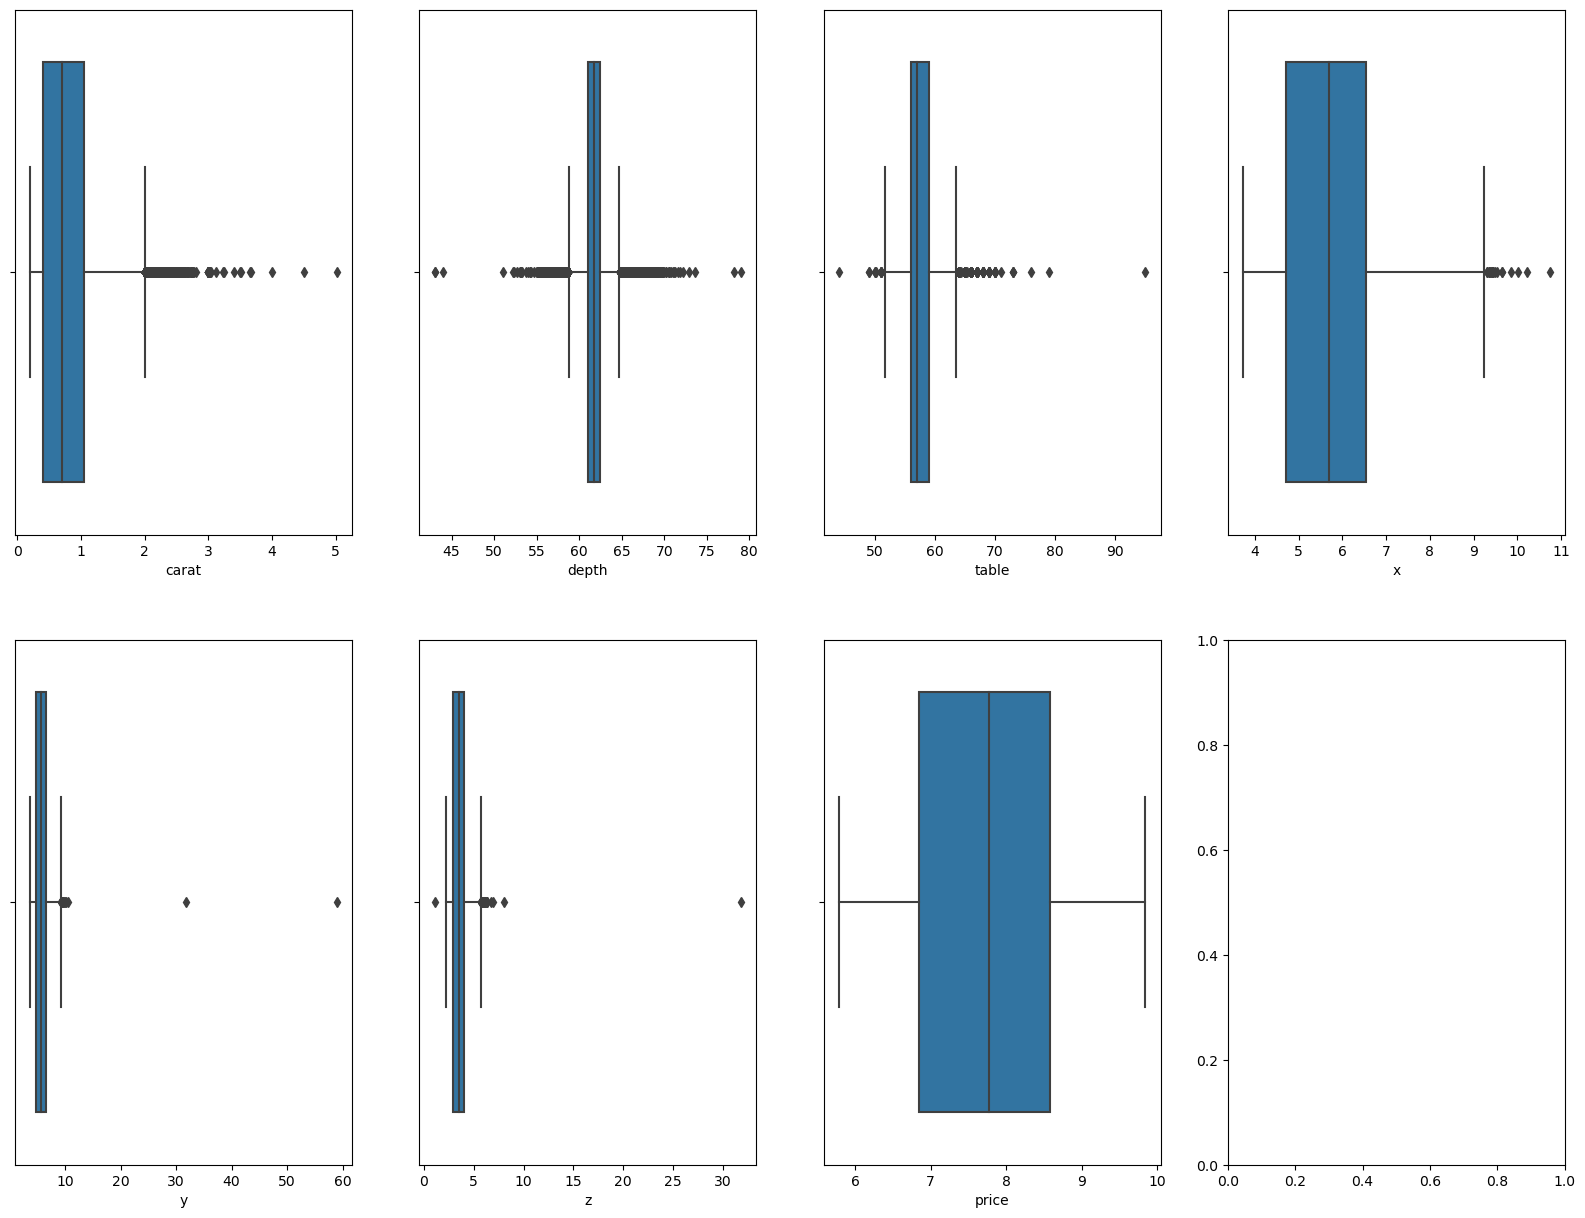

In [3]:
# seleccionamos solo aquellas variables numéricas

df_numericas = df.select_dtypes(include=np.number)

fig, axes = plt.subplots(2, 4, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])

plt.show()

Vemos que la unica variable númerica sin outliers es la del precio, la variable respuesta.

Una vez detectados de manera visual, hacemos un diccionario con los outliers de cada columna:

In [4]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices

In [5]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [6]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 4847, 49

In [7]:
# Veamos el nº de outliers de cada valor
for columna, outliers in ind.items():
    num_outliers = len(outliers)
    print(f"La columna '{columna}' tiene {num_outliers} outliers.")

La columna 'carat' tiene 1435 outliers.
La columna 'depth' tiene 1896 outliers.
La columna 'table' tiene 448 outliers.
La columna 'x' tiene 19 outliers.
La columna 'y' tiene 17 outliers.
La columna 'z' tiene 26 outliers.


In [8]:
# Convierte las dimensiones a centímetros
df['x_cm'] = df['x'] * 10  
df['y_cm'] = df['y'] * 10
df['z_cm'] = df['z'] * 10
df['peso_gramos'] = df['carat'] * 0.2
df['Volumen (cm^3)'] = df['x_cm'] * df['y_cm'] * df['z_cm']
df['Densidad (g/cm^3)'] = df['peso_gramos'] / df['Volumen (cm^3)']

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,x_cm,y_cm,z_cm,peso_gramos,Volumen (cm^3),Densidad (g/cm^3)
id,,,,,,,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,43.1,42.8,26.8,0.060,49437.424,0.000001
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,64.2,64.6,40.4,0.202,167551.728,0.000001
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,57.1,57.4,35.4,0.144,116024.916,0.000001
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,65.4,65.0,41.2,0.216,175141.200,0.000001
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,45.0,45.5,28.2,0.072,57739.500,0.000001


In [10]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40354.0,0.797175,4.752128e-01,2.000000e-01,0.400000,0.700000,1.040000,5.010000e+00
depth,40354.0,61.745031,1.436016e+00,4.300000e+01,61.000000,61.800000,62.500000,7.900000e+01
table,40354.0,57.452800,2.234866e+00,4.400000e+01,56.000000,57.000000,59.000000,9.500000e+01
x,40354.0,5.729692,1.121938e+00,3.730000e+00,4.710000,5.690000,6.540000,1.074000e+01
y,40354.0,5.733340,1.152070e+00,3.680000e+00,4.720000,5.700000,6.540000,5.890000e+01
z,40354.0,3.538778,7.070876e-01,1.070000e+00,2.910000,3.520000,4.030000,3.180000e+01
price,40354.0,7.783649,1.016550e+00,5.787000e+00,6.851000,7.780000,8.580750,9.842000e+00
x_cm,40354.0,57.296925,1.121938e+01,3.730000e+01,47.100000,56.900000,65.400000,1.074000e+02
y_cm,40354.0,57.333399,1.152070e+01,3.680000e+01,47.200000,57.000000,65.400000,5.890000e+02
z_cm,40354.0,35.387781,7.070876e+00,1.070000e+01,29.100000,35.200000,40.300000,3.180000e+02


In [11]:
# Filtrar los valores en el rango '3.51-5.53'
valores_en_rango = df[(df['Densidad (g/cm^3)'] >= 3.51) & (df['Densidad (g/cm^3)'] <= 3.53)]

# Contar el número de valores en el rango
cantidad_en_rango = valores_en_rango.shape[0]

In [12]:
cantidad_en_rango

0